--- RF ---
Accuracy 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC Score 0.9947592531935802


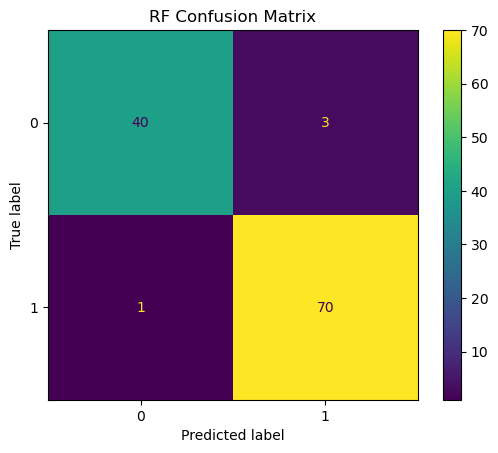

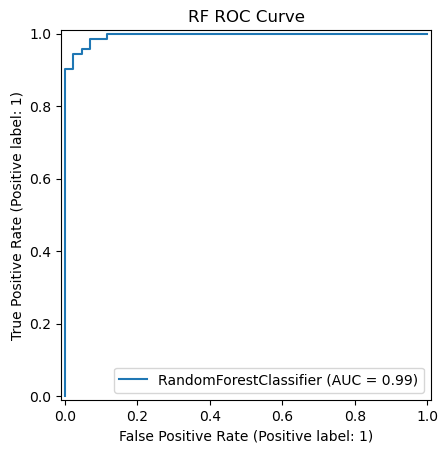

--- GDB ---
Accuracy 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score 0.9944317065181788


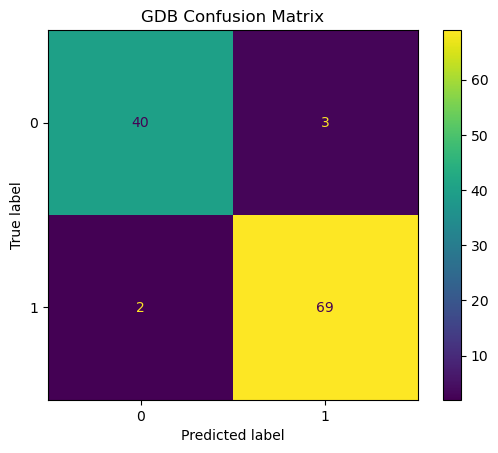

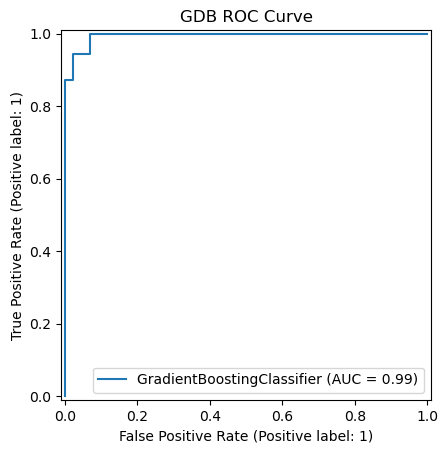

--- XGB ---
Accuracy 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score 0.9908286930887652


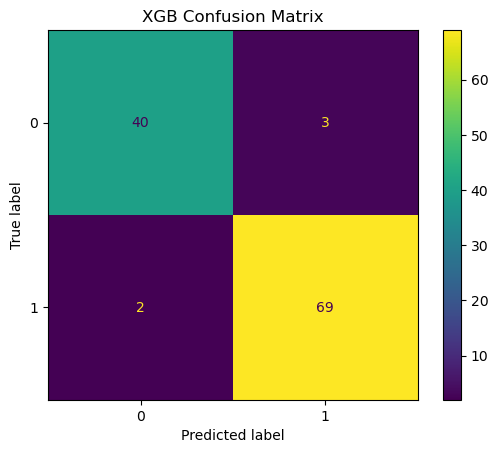

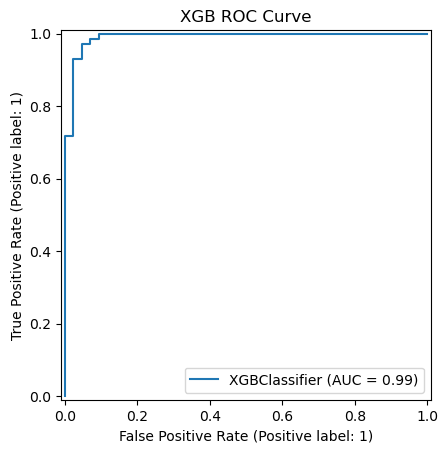

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "RF": RandomForestClassifier(),
    "GDB": GradientBoostingClassifier(),
    "XGB": XGBClassifier(eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    print(f"--- {name} ---")
    print("Accuracy" , accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("ROC AUC Score", roc_auc_score(y_test, proba))

    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'{name} ROC Curve')
    plt.show()


RF Results
Acc Score 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.98      0.98      0.98       109

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



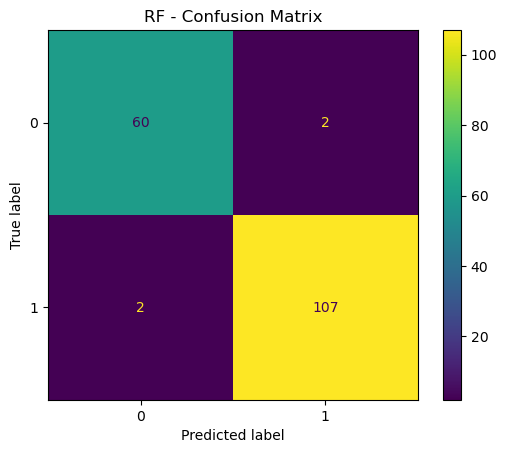

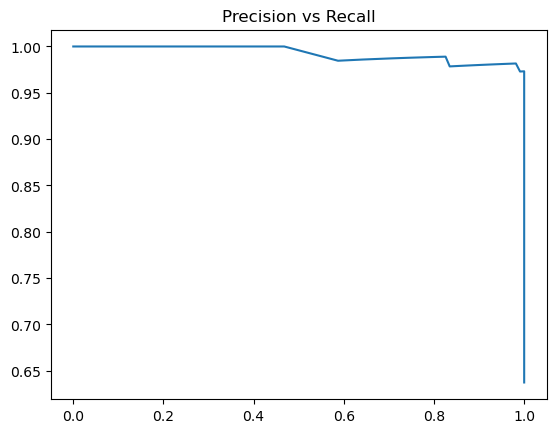

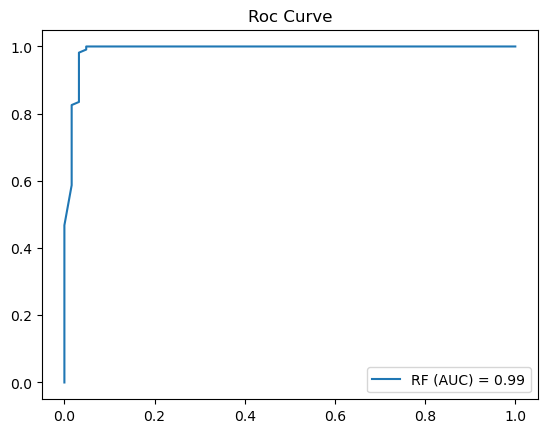


GDB Results
Acc Score 0.9707602339181286
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.97      0.98      0.98       109

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



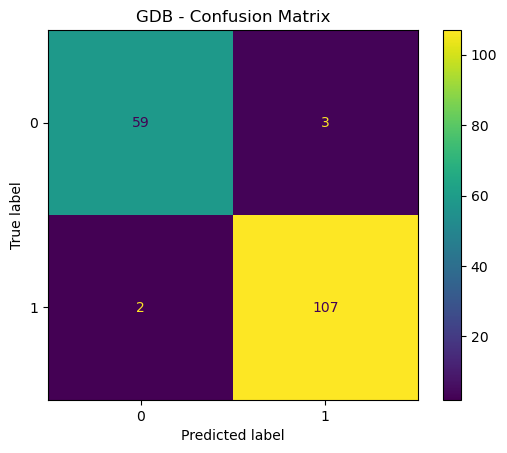

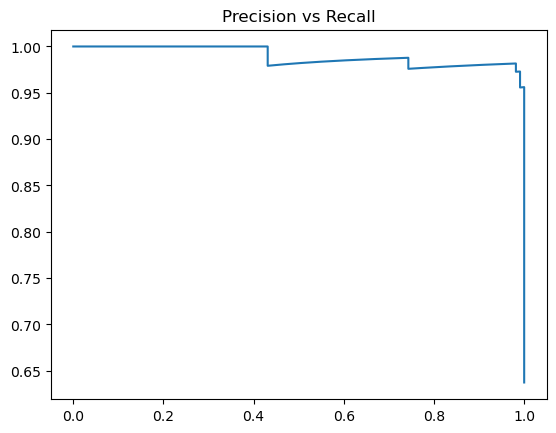

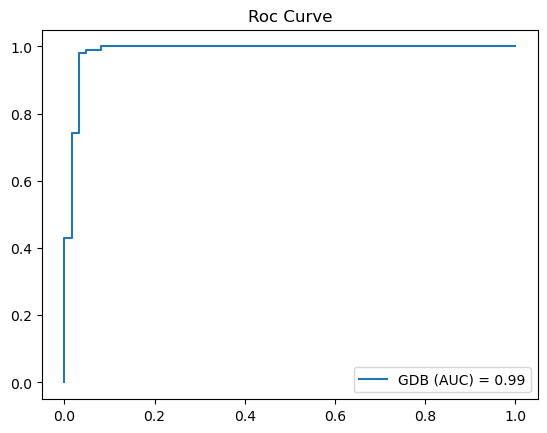


XGB Results
Acc Score 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.98      0.98      0.98       109

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



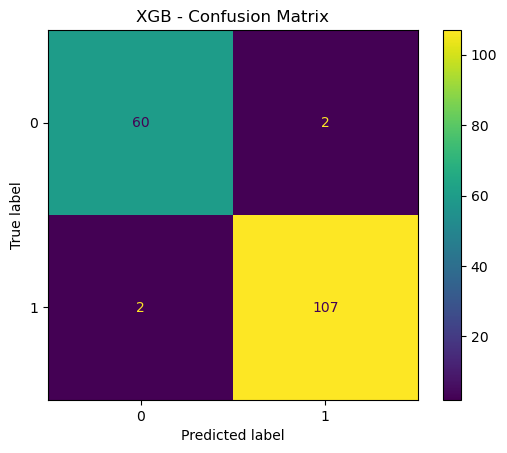

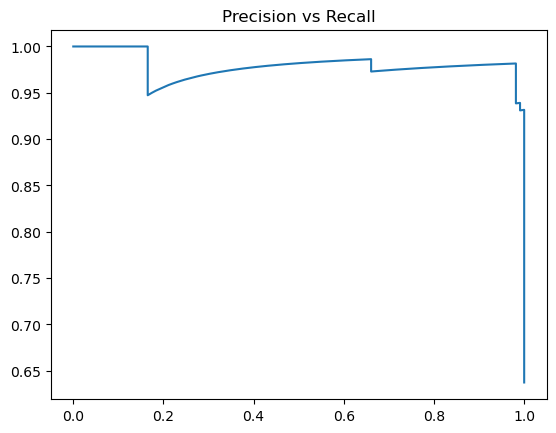

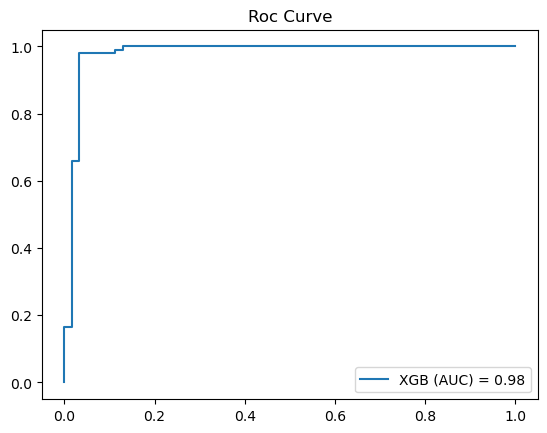

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

models = {
    "RF": RandomForestClassifier(),
    "GDB": GradientBoostingClassifier(),
    "XGB": XGBClassifier(eval_metric='logloss')
}


for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Results")
    print("Acc Score", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

    cm = confusion_matrix(y_test, pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, proba)
    plt.plot(recall, precision, label=f"{name}")
    plt.title("Precision vs Recall")
    plt.show()


    fpr, tpr, thresholds = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC) = {auc:.2f}')
    plt.title("Roc Curve")
    plt.legend()
    plt.show()